In [1]:
import pandas as pd
import numpy as np

In [2]:
original_df = pd.read_csv("./data/processed_movie_data.csv", delimiter=';', encoding='utf-8')
original_df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0,303,0.112121,1995,10,0,0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0,395,-0.218750,1995,12,4,1
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
4681,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
4682,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2
4683,2000000.0,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,1.0,1.0,2010-09-30,1268793.0,107.0,1.0,4.0,3.0,534,0.000000,2010,9,3,9


In [3]:
df = original_df.copy()

In [4]:
from utils.kohonen.kohonen import build_kohonen_net
from utils.kohonen.neuron_neighbours import prop2iters_neighbour_radius, relu_like_neighbour_radius, exp_neighbour_radius
from utils.kohonen.neuron_lr import inv2iter_learning_rate, fixed_learning_rate

In [5]:
seed = 245

In [6]:
init_f = "sample no repos"
init_with_sample = True
picker_f = "stochastic"
neighbour_f = prop2iters_neighbour_radius
lr_f = fixed_learning_rate
grid_type = "rectangular"

In [7]:
random_state = np.random.default_rng(seed)

In [8]:
cols = ["budget", "popularity", "production_companies", 
        "production_countries", "revenue", "runtime", 
        "spoken_languages", "vote_average", "vote_count",
        "overview_length", "sentiment", "year",
        "month", "weekday", "genre_id"]

In [9]:
to_normalize = cols
for i in range(len(to_normalize)):
    df[to_normalize[i]] = (df[to_normalize[i]] - df[to_normalize[i]].mean()) / df[to_normalize[i]].std()
df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,-0.030242,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",2.297018,-0.888981,-0.467054,1995-10-30,1.813769,-1.351069,-0.528057,1.573598,3.973387,-0.003497,0.312006,-0.291643,0.885889,-2.399597,-1.326392
1,0.850490,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,1.420062,0.025974,-0.467054,1995-12-15,1.108865,-0.287850,0.534179,0.686010,1.436552,0.570333,-1.197489,-0.291643,1.475559,0.619027,-1.021418
2,-0.382535,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",-0.919488,-0.888981,-0.467054,1995-12-22,-0.045295,0.775369,-0.528057,-0.201578,-0.573818,-0.209328,2.537798,-0.291643,1.475559,0.619027,-0.716444
3,0.724671,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",1.581780,0.025974,-0.467054,1995-12-15,0.629238,2.763126,0.534179,1.573598,0.991211,0.196096,-0.443914,-0.291643,1.475559,0.619027,-0.411471
4,0.095577,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,-0.675489,0.025974,-0.467054,1995-12-22,-0.154140,-0.195396,-0.528057,-0.867269,-0.455512,0.900909,-0.731766,-0.291643,1.475559,0.619027,-0.411471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,-0.729883,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",-1.437329,-0.888981,-0.467054,2005-12-30,-0.548344,-0.149169,-0.528057,-0.756321,-0.594100,2.279350,0.266211,0.343454,1.475559,0.619027,-0.716444
4681,-0.483190,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,-1.370451,-0.888981,-0.467054,2007-06-14,-0.442768,3.456530,0.534179,0.686010,-0.581424,-1.163633,-0.452966,0.470473,-0.293450,-0.135629,-0.411471
4682,-0.765025,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",-1.445233,-1.346458,-1.755714,2006-11-23,-0.555237,-0.472758,-0.528057,-0.534424,-0.597480,0.464299,1.534118,0.406964,1.180724,-0.135629,-0.716444
4683,-0.734828,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",-1.584158,-0.888981,-0.467054,2010-09-30,-0.555617,-0.149169,-0.528057,-2.531497,-0.600015,1.437316,-0.199512,0.661002,0.591054,-0.135629,1.418372


In [10]:
kohonen_net = build_kohonen_net(df, cols, 4, len(cols)*500, 
                                init_f, picker_f, 
                                neighbour_f, lr_f, 
                                grid_type, random_state, True, len(cols)*10)

In [11]:
import matplotlib.pyplot as plt

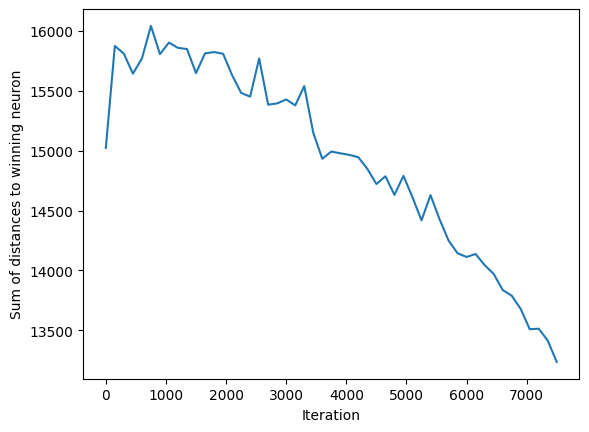

In [12]:
x_sum_dists = [t[0] for t in kohonen_net.sum_dists]
y_sum_dists = [t[1] for t in kohonen_net.sum_dists]
plt.xlabel("Iteration")
plt.ylabel("Sum of distances to winning neuron")
plt.plot(x_sum_dists, y_sum_dists)

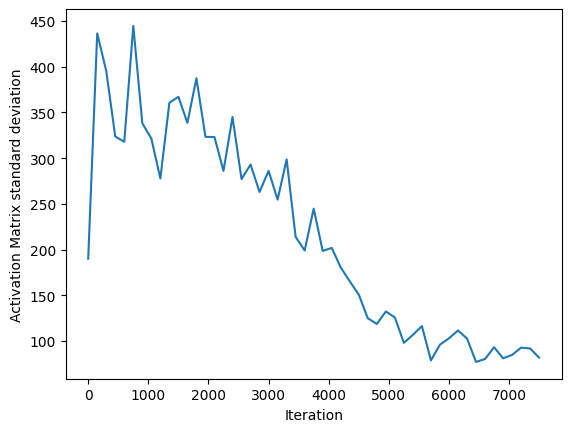

In [13]:
x_act_mat_sigmas = [t[0] for t in kohonen_net.act_mat_sigmas]
y_act_mat_sigmas = [t[1] for t in kohonen_net.act_mat_sigmas]
x_act_mat_sigmas = np.array(x_act_mat_sigmas)
y_act_mat_sigmas = np.array(y_act_mat_sigmas)
plt.xlabel("Iteration")
plt.ylabel("Activation Matrix standard deviation")
plt.plot(x_act_mat_sigmas, y_act_mat_sigmas)

In [14]:
act_mat = kohonen_net.activations_mat(df)
act_mat

array([[171, 192, 258, 249],
       [230, 301, 205, 339],
       [274, 451, 275, 458],
       [324, 242, 355, 361]])

In [15]:
act_map = kohonen_net.activations_map(df)
act_map

{(0, 0): [0,
  91,
  120,
  123,
  158,
  178,
  193,
  246,
  332,
  348,
  358,
  388,
  470,
  527,
  577,
  652,
  858,
  1143,
  1272,
  1343,
  1345,
  1489,
  1494,
  1518,
  1593,
  1599,
  1699,
  1724,
  1791,
  1813,
  1815,
  1897,
  1943,
  2014,
  2058,
  2059,
  2063,
  2089,
  2145,
  2237,
  2293,
  2297,
  2305,
  2309,
  2315,
  2393,
  2400,
  2481,
  2485,
  2492,
  2509,
  2551,
  2574,
  2612,
  2630,
  2657,
  2665,
  2667,
  2689,
  2694,
  2757,
  2832,
  2843,
  2848,
  2850,
  2913,
  2918,
  2939,
  2995,
  3005,
  3007,
  3016,
  3019,
  3026,
  3101,
  3106,
  3124,
  3164,
  3184,
  3199,
  3218,
  3221,
  3225,
  3226,
  3299,
  3301,
  3387,
  3399,
  3409,
  3418,
  3427,
  3430,
  3443,
  3515,
  3530,
  3531,
  3533,
  3538,
  3557,
  3610,
  3619,
  3620,
  3629,
  3632,
  3633,
  3641,
  3686,
  3688,
  3694,
  3700,
  3709,
  3748,
  3761,
  3770,
  3773,
  3774,
  3778,
  3790,
  3794,
  3796,
  3798,
  3800,
  3837,
  3871,
  3875,
  3877,
  39

In [16]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

display(df.iloc[act_map[(0,0)]])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,-0.030242,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",2.297018,-0.888981,-0.467054,1995-10-30,1.813769,-1.351069,-0.528057,1.573598,3.973387,-0.003497,0.312006,-0.291643,0.885889,-2.399597,-1.326392
91,-0.508354,Adventure,tt0076759,Star Wars,Princess Leia is captured and held hostage by ...,5.889691,-0.431503,-0.467054,1977-05-25,4.371281,0.498007,-0.528057,2.017392,5.125188,0.052638,-0.541675,-1.434818,-0.588285,-0.890285,-1.021418
120,0.598852,Comedy,tt0109830,Forrest Gump,A man with a low IQ has accomplished great thi...,6.984684,-0.888981,-0.467054,1994-07-06,3.751050,1.468773,-0.528057,2.128341,6.282059,0.638943,1.209877,-0.355153,0.001384,-0.890285,-0.716444
123,0.347214,Family,tt0110357,The Lion King,A young lion cub named Simba can't wait to be ...,2.236345,-0.431503,-0.467054,1994-06-23,4.453024,-0.981254,-0.528057,1.906444,4.062117,-1.082548,0.256707,-0.355153,-0.293450,-0.135629,2.638267
158,0.800162,Adventure,tt0107290,Jurassic Park,A wealthy entrepreneur secretly creates a them...,-0.029573,-0.431503,-0.467054,1993-06-11,5.292228,0.775369,0.534179,1.462650,3.585509,0.277181,0.484816,-0.418662,-0.293450,0.619027,-1.021418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,0.397542,Thriller,tt2543164,Arrival,Taking place after alien crafts land around th...,3.878097,0.483452,-0.467054,2016-11-10,0.730759,0.128192,1.596415,1.018855,4.238732,-0.901667,-0.997893,1.042061,1.180724,-0.135629,2.028320
4584,-0.030242,Comedy,tt3783958,La La Land,"Mia, an aspiring actress, serves lattes to mov...",1.894186,0.940929,-0.467054,2016-11-29,2.271256,0.821596,-0.528057,1.795495,3.407204,0.364503,0.150256,1.042061,1.180724,-1.644941,-0.716444
4603,2.989411,Adventure,tt3521164,Moana,"In Ancient Polynesia, when a terrible curse in...",0.020163,-0.431503,-0.467054,2016-11-23,3.528861,-0.149169,-0.528057,1.129804,2.330613,-0.733260,-1.828862,1.042061,1.180724,-0.890285,-1.021418
4608,4.247600,Action,tt3748528,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,4.897018,0.940929,-0.467054,2016-12-14,6.157520,1.052730,-0.528057,1.240752,3.716492,-1.138684,0.422604,1.042061,1.475559,-0.890285,-0.411471


In [17]:
u_mat = kohonen_net.u_mat()
u_mat

array([[3.89331531, 2.85381706, 2.64877062, 2.98638103],
       [2.97032992, 1.81393851, 1.83936174, 2.16299374],
       [2.20573234, 1.56719057, 1.71342314, 1.68669384],
       [2.0151489 , 1.77832749, 1.95186011, 1.86691107]])

In [18]:
from utils.kohonen.plots import plot_u_mat, plot_mat

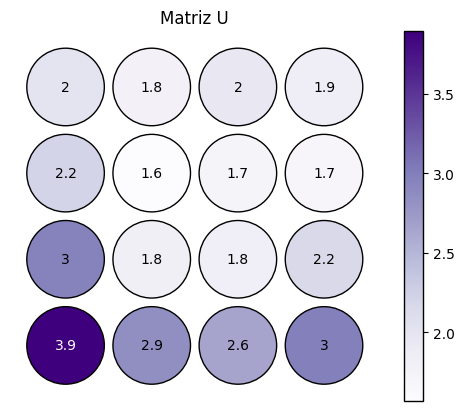

In [19]:
plot_u_mat(kohonen_net, u_mat)

In [20]:
kohonen_net.neuron_weights

array([[[ 2.663646  ,  1.7508171 ,  0.57609248,  0.02449933,
          3.20963322,  0.59483538,  0.85394716,  0.75825946,
          3.32124977,  0.12482089, -0.05301026,  0.65354536,
          0.45928121, -0.58223776, -0.05955076],
        [ 1.71442871,  0.67488899,  0.41655161, -0.19538679,
          1.1168508 ,  0.31593856,  0.41077859, -0.12885901,
          1.05386305,  0.00640725, -0.21570044,  0.37291909,
          0.05681572, -0.0622051 , -0.46174332],
        [ 0.22160583,  0.36857689,  0.75740478,  0.68147064,
          0.03154729,  0.14731824,  1.72737074,  0.06044776,
          0.10915299, -0.24195013, -0.27433679,  0.38069366,
          0.00414124, -0.50312245, -0.07051186],
        [-0.14684852,  0.09080321,  2.127535  ,  2.1219588 ,
         -0.28520259,  0.23399142, -0.06018078,  0.06076848,
         -0.18735549, -0.32266135,  0.36725196,  0.46477015,
          0.01955915, -0.3205618 ,  0.20848843]],

       [[ 0.55103998,  0.7800673 ,  0.26139832, -0.05413598,
         

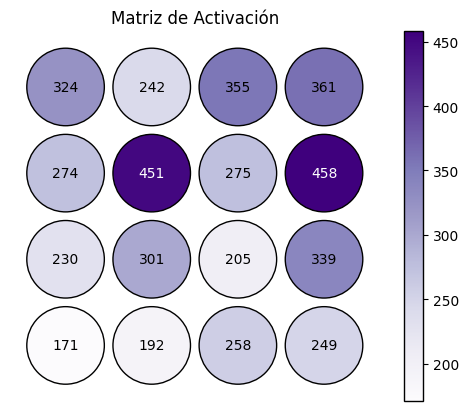

In [21]:
plot_mat(kohonen_net, act_mat, "Matriz de Activación")

In [22]:
kohonen_net.init_neuron_weights

array([[[-3.57371371e-01,  1.20098824e+00, -4.31503281e-01,
         -4.67053560e-01,  5.94998309e-01, -3.34077040e-01,
         -5.28057150e-01,  2.42215879e-01, -3.15233696e-01,
          1.96095828e-01,  6.21681200e-01, -2.91643050e-01,
         -8.83120316e-01,  6.19027433e-01, -7.16444308e-01],
        [-2.31552478e-01, -2.10524406e-01,  1.85588399e+00,
          8.55357159e+00, -4.50983634e-01,  2.66872872e-01,
          2.65865098e+00,  1.01885547e+00, -4.20019691e-01,
          4.20638219e-01,  2.07826127e-01,  3.43453951e-01,
          1.18072425e+00, -8.90284835e-01,  1.41837225e+00],
        [ 1.10212779e+00,  1.00447359e+00,  4.83451628e-01,
         -4.67053560e-01,  1.01544018e+00, -1.95396291e-01,
         -5.28057150e-01,  6.86009932e-01,  1.08247627e+00,
         -1.90616067e-01, -7.44438827e-01,  2.59054508e-02,
          1.18072425e+00, -2.39959710e+00,  8.08424664e-01],
        [-7.36841154e-01, -1.11718611e+00, -8.88980735e-01,
         -4.67053560e-01, -5.42307956

In [23]:
kohonen_net.neuron_positions[0,0]

array([0., 0.])

In [24]:
from utils.distance import euclidean_distance

if init_with_sample:
    init_sample = dict()
    sample_to_neu = dict()

    for idx, sample in df.iterrows():
        sample_df = sample.to_frame().T
        X_p = sample_df[cols].to_numpy().astype(float)
        for i in range(kohonen_net.k):
            for j in range(kohonen_net.k):
                dist = euclidean_distance(np.reshape(X_p, (X_p.size,)), np.reshape(kohonen_net.init_neuron_weights[i, j], (X_p.size,)))
                if dist <= np.finfo(float).eps:
                    init_sample[(i, j)] = idx
                    sample_to_neu[idx] = (i, j)

    display(init_sample)

{(0, 0): 112,
 (1, 1): 532,
 (1, 2): 534,
 (0, 2): 1254,
 (3, 1): 1515,
 (2, 2): 1903,
 (3, 0): 1986,
 (3, 2): 2189,
 (1, 3): 2268,
 (0, 3): 2313,
 (0, 1): 2387,
 (2, 3): 3300,
 (3, 3): 3654,
 (2, 0): 3988,
 (2, 1): 4167,
 (1, 0): 4608}

In [25]:
if init_with_sample:
    init_sample_vals = list(init_sample.values())
    display(original_df.iloc[init_sample_vals])

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
112,17000000.0,Comedy,tt0114924,While You Were Sleeping,A love story built on a misunderstanding. A tr...,15.783615,2.0,1.0,1995-04-21,1.820570e+08,103.0,1.0,6.5,340.0,335,0.180000,1995,4,4,2
532,28000000.0,Drama,tt0119485,Kundun,The Tibetans refer to the Dalai Lama as 'Kundu...,5.017520,1.0,1.0,1997-12-25,5.684789e+06,134.0,3.0,6.8,92.0,314,-0.025000,1997,12,3,4
534,25000000.0,Comedy,tt0119223,Great Expectations,Loosely based on the Charles Dickens' classic ...,9.941228,2.0,1.0,1998-01-19,5.549407e+07,111.0,1.0,6.4,131.0,366,0.432401,1998,1,0,2
1254,75000000.0,Science Fiction,tt0217869,Unbreakable,An ordinary man makes an extraordinary discove...,14.678550,4.0,1.0,2000-11-13,2.481181e+08,106.0,1.0,6.9,1994.0,273,-0.119444,2000,11,0,7
1515,15000000.0,Adventure,tt0086346,Spacehunter: Adventures in the Forbidden Zone,Three women makes an emergency landing on a pl...,3.521436,3.0,1.0,1983-05-20,1.650000e+07,90.0,1.0,5.1,37.0,283,0.000000,1983,5,4,1
1903,40000000.0,Horror,tt0348836,Gothika,"After a car crash, a criminal psychologist (Ha...",10.939066,3.0,1.0,2003-11-21,1.415913e+08,98.0,1.0,5.8,643.0,436,-0.085714,2003,11,4,8
1986,25000000.0,Comedy,tt0265208,The Girl Next Door,Exceptionally ambitious high schooler Matthew ...,13.083718,4.0,1.0,2004-04-09,3.041118e+07,108.0,1.0,6.3,844.0,346,0.320000,2004,4,4,2
2189,3400000.0,Comedy,tt0088821,Bliss,An advertising executive dies and goes to hell...,0.403190,2.0,1.0,1985-10-04,6.605370e+05,112.0,1.0,5.2,5.0,363,0.000000,1985,10,4,2
2268,35000000.0,Horror,tt0257516,Cursed,A werewolf loose in Los Angeles changes the li...,8.949722,4.0,2.0,2005-02-25,1.929490e+07,97.0,1.0,5.1,168.0,214,0.157692,2005,2,4,8
2313,1920000.0,Drama,tt0049778,Somebody Up There Likes Me,"Rocky Graziano is building a career in crime, ...",2.747776,1.0,1.0,1956-07-03,3.360000e+06,113.0,1.0,6.8,30.0,407,0.115152,1956,7,1,4


In [26]:
from utils.pca import pca, plot_pca
import seaborn as sns

In [27]:
pca_data = pca(original_df, cols)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/pauli/Git/unsupervised-learning/utils/pca.py:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pca_data.xs[i], pca_data.ys[i], s=200, label=varnames, c=colors[i])


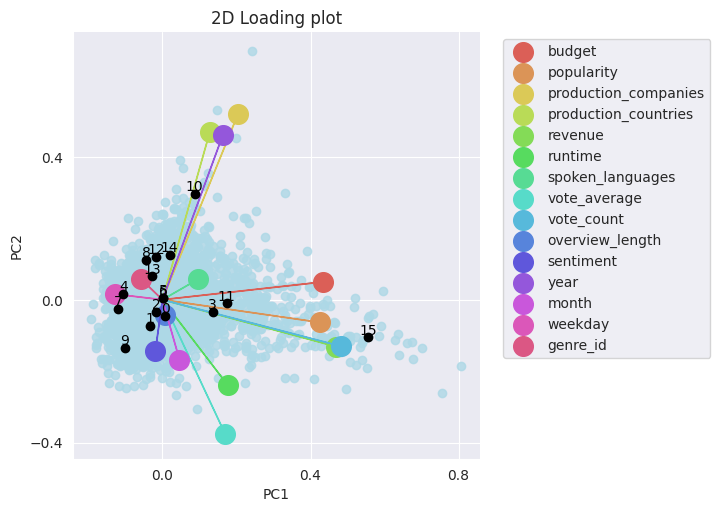

In [32]:
if init_with_sample:
    data = pca_data.pca_df_scaled.iloc[init_sample_vals].to_numpy()
    sns.set_style("darkgrid")
    plot_pca(pca_data)
    plt.scatter(data[:,0], data[:, 1], color="k")
    for i in range(data.shape[0]):
        plt.annotate("{}".format(i), xy=(data[i, 0], data[i, 1]), 
                    textcoords="data", ha="center", va="bottom", color="k")

In [31]:
if init_with_sample:
    vals_dict = dict()
    vals_dict["Neuron"] = []
    for i in range(len(init_sample_vals)):
        vals_dict["Neuron"].append(sample_to_neu[init_sample_vals[i]])
    vals_dict_df = pd.DataFrame(data=vals_dict)
    vals_dict_df

,Neuron
0,"(0, 0)"
1,"(1, 1)"
2,"(1, 2)"
3,"(0, 2)"
4,"(3, 1)"
5,"(2, 2)"
6,"(3, 0)"
7,"(3, 2)"
8,"(1, 3)"
9,"(0, 3)"
